## Import and input + data preperation

In [38]:
import pandas as pd
from saxpy.sax import *
import numpy as np
from matplotlib import pyplot as plt

df1 = pd.read_csv('./datasets/BATADAL_dataset03.csv')
df2 = pd.read_csv('./datasets/BATADAL_dataset04.csv')
df2.columns = df2.columns.str.replace(' ', '')
# all timestamps for attacks
attack_timestamps = list(df2.loc[df2['ATT_FLAG']==1].index)


## Discretize data and visualization

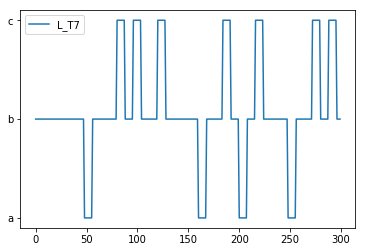

In [37]:
# initialize sax parameters
window = 49
paa = 8
alpha = 3
sensor = 'L_T7'

# perform discretization for training set 1
sax1 = sax_via_window(np.array(df1[sensor]), window, paa, alpha, "none", 0.01)


# create visualization of discrete values
symbol_to_number = {'a':1, 'b':2,'c':3}
discrete = []

for i in range(0,len(df1[sensor]),paa):
    for gram in list(sax1.keys()):
        if i in sax1[gram]:
            for k in range(0,paa):
                discrete.append(symbol_to_number[gram[0]])
            break
   
plt.plot(np.array(discrete)[0:300])
plt.yticks(np.array([x for x in range(1,alpha+1)]),('a','b','c'))
plt.savefig(sensor)
plt.legend([sensor])
plt.show()

## Compute N-gram probabilities for training set 1 and training set 2

In [34]:
# store all ngrams found in training set 1
n_grams = list(sax1.keys())
sax2 = sax_via_window(np.array(df2[sensor]),window,paa,alpha,"none",0.01)
n_grams2 = list(sax2.keys())

## Anomaly detection

In [39]:
detected_indices = []
possible_anomalies = set()

for ngram in n_grams2:
    if ngram not in n_grams:
        detected_indices.append(sax2[ngram])
     
TP = 0
FP = 0

for index_list in detected_indices:
    for i in index_list:
        possible_anomalies.add(i)
            

for i in list(possible_anomalies):
    if i in attack_timestamps:
        TP +=1         
    else:
        FP += 1
    
print(len(possible_anomalies))   
print(TP)
print(FP)

429
23
406
